## Data loading

In [1]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)

## Data cleaning

In [2]:
# Data cleaning
print("Number of rows original dataset is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df = df.groupby(['sorting_center_name', 'scanning_date', 'output_belt'], as_index = False)['no_of_events'].sum()
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned dataset is: " + str(df.shape[0]))

Number of rows original dataset is: 8949721
Number of rows cleaned dataset is: 188628


## Data preparation

In [3]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1
df['yearday'] = df['scanning_date'].dt.day_of_year
df['yearday_sin'] = np.sin(df['yearday'] / 7 * 2 * np.pi)
df['yearday_cos'] = np.cos(df['yearday'] / 7 * 2 * np.pi)

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

VANTAA       44006
TAMPERE      41481
LIETO        35434
OULU         31037
KUOPIO       27888
SEINÄJOKI     8782
Name: sorting_center_name, dtype: int64

In [4]:
#aggregating data
adf = df.groupby(['scanning_date','sorting_center_name'])['no_of_events'].sum().reset_index()
adf['day'] = adf['scanning_date'].dt.day
adf['month'] = adf['scanning_date'].dt.month
adf['weekday'] = adf['scanning_date'].dt.day_of_week + 1
adf['week'] = adf['scanning_date'].dt.day_of_year // 7 + 1
adf['yearday'] = adf['scanning_date'].dt.day_of_year
adf['yearday_sin'] = np.sin(adf['yearday'] / 7 * 2 * np.pi)
adf['yearday_cos'] = np.cos(adf['yearday'] / 7 * 2 * np.pi)
adf

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
0,2023-01-01,LIETO,3650,1,1,7,1,1,7.818315e-01,0.623490
1,2023-01-01,OULU,1441,1,1,7,1,1,7.818315e-01,0.623490
2,2023-01-01,TAMPERE,1458,1,1,7,1,1,7.818315e-01,0.623490
3,2023-01-02,KUOPIO,23812,2,1,1,1,2,9.749279e-01,-0.222521
4,2023-01-02,LIETO,44598,2,1,1,1,2,9.749279e-01,-0.222521
...,...,...,...,...,...,...,...,...,...,...
1876,2023-12-29,OULU,19831,29,12,5,52,363,-7.818315e-01,0.623490
1877,2023-12-29,SEINÄJOKI,15100,29,12,5,52,363,-7.818315e-01,0.623490
1878,2023-12-29,TAMPERE,34499,29,12,5,52,363,-7.818315e-01,0.623490
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [5]:
import torch
print(torch.cuda.device_count())  # 查看有多少个 CUDA 设备
for i in range(torch.cuda.device_count()):
    print(f"Device {i}: {torch.cuda.get_device_name(i)}")



1
Device 0: NVIDIA GeForce RTX 4070


In [6]:
# Plot should be difference between predicted and reality
# I'm not sure if scaling on the number of events is good, because you are trying to predict that
# Do LSTMs work per row or not?
# Split the data by date, don't use random split

In [7]:
import torch
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)
!pip install hyperopt



12.4
True


In [8]:
#In this project, we used Optuna to automatically find the best set of hyperparameters that optimize the performance of our LSTM model. 
#Hyperparameters such as the hidden size, number of LSTM layers, learning rate, and sequence length have a significant impact on how well the model performs.
#Instead of manually tuning these parameters, which is time-consuming and often inefficient, Optuna allows us to automate this process and find the optimal combination.
#Optuna works by conducting multiple trials where it suggests different hyperparameter values and evaluates the model's performance based on a target metric—in our case, the root mean square error (RMSE). 
#The process begins with defining an objective function, which includes training the model using the hyperparameters suggested by Optuna. 
#After training, the function computes the RMSE on the validation set, which is then passed back to Optuna. Optuna uses this feedback to refine its suggestions, gradually improving its search for the best parameters.
#It utilizes a technique called Tree-structured Parzen Estimator (TPE), which is more efficient than traditional methods like grid search or random search because it focuses on the most promising areas of the hyperparameter space. 
#After running multiple trials, Optuna identifies the best-performing set of hyperparameters, which we can then use to retrain the model for final evaluation. This method saves time, improves model performance, and removes much of the guesswork from manual tuning, making it a powerful tool for optimizing machine learning models.

Using device: cuda
Training model for sorting center: KUOPIO


E:\PYT\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1/30, Total Loss: 0.06740621365606785
Epoch 2/30, Total Loss: 0.06806868016719818
Epoch 3/30, Total Loss: 0.06743629612028598
Epoch 4/30, Total Loss: 0.06727175824344159
Epoch 5/30, Total Loss: 0.067883425578475
Epoch 6/30, Total Loss: 0.06723932512104511
Epoch 7/30, Total Loss: 0.06769309565424919
Epoch 8/30, Total Loss: 0.0674513302743435
Epoch 9/30, Total Loss: 0.06725656166672707
Epoch 10/30, Total Loss: 0.06713730059564113
Epoch 11/30, Total Loss: 0.067720328271389
Epoch 12/30, Total Loss: 0.06712140254676342
Epoch 13/30, Total Loss: 0.06764954887330532
Epoch 14/30, Total Loss: 0.06762963812798262
Epoch 15/30, Total Loss: 0.06706568263471127
Epoch 16/30, Total Loss: 0.06677621975541115
Epoch 17/30, Total Loss: 0.06843502335250377
Epoch 18/30, Total Loss: 0.067622746899724
Epoch 19/30, Total Loss: 0.06635082866996526
Epoch 20/30, Total Loss: 0.06667904201894999
Epoch 21/30, Total Loss: 0.06679267473518849
Epoch 22/30, Total Loss: 0.06647262088954449
Epoch 23/30, Total Loss: 0

E:\PYT\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 1/30, Total Loss: 0.06363591392125402
Epoch 2/30, Total Loss: 0.0628608310861247
Epoch 3/30, Total Loss: 0.06428637249129159
Epoch 4/30, Total Loss: 0.06422551934208189
Epoch 5/30, Total Loss: 0.06584384930985314
Epoch 6/30, Total Loss: 0.06382739277822631
Epoch 7/30, Total Loss: 0.06211480711187635
Epoch 8/30, Total Loss: 0.06438071333936282
Epoch 9/30, Total Loss: 0.06343480518886022
Epoch 10/30, Total Loss: 0.06436600110360555
Epoch 11/30, Total Loss: 0.06425510027578898
Epoch 12/30, Total Loss: 0.06468901038169861
Epoch 13/30, Total Loss: 0.06331447352256094
Epoch 14/30, Total Loss: 0.06316190479057175
Epoch 15/30, Total Loss: 0.06551926157304219
Epoch 16/30, Total Loss: 0.06414471247366496
Epoch 17/30, Total Loss: 0.06342083109276635
Epoch 18/30, Total Loss: 0.06469811020152909
Epoch 19/30, Total Loss: 0.06459770564522062
Epoch 20/30, Total Loss: 0.06389135069080762
Epoch 21/30, Total Loss: 0.06507731122629982
Epoch 22/30, Total Loss: 0.06482953950762749
Epoch 23/30, Total L

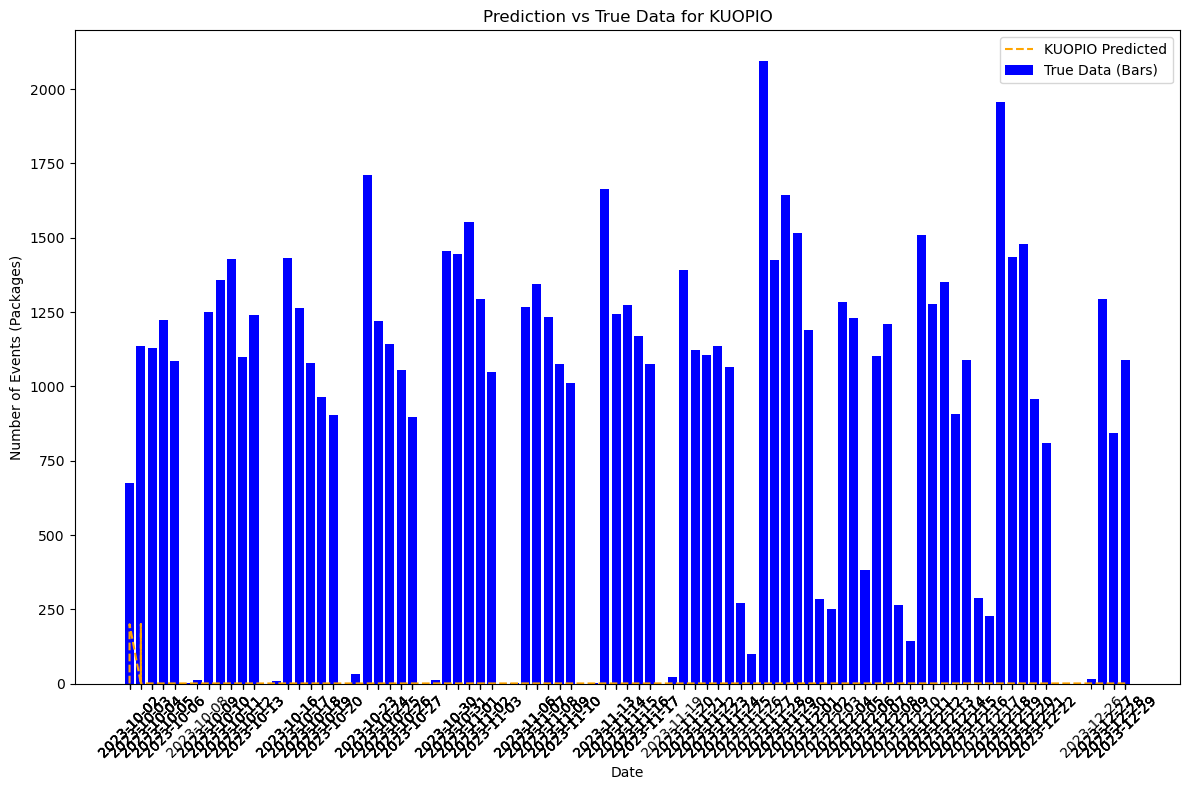

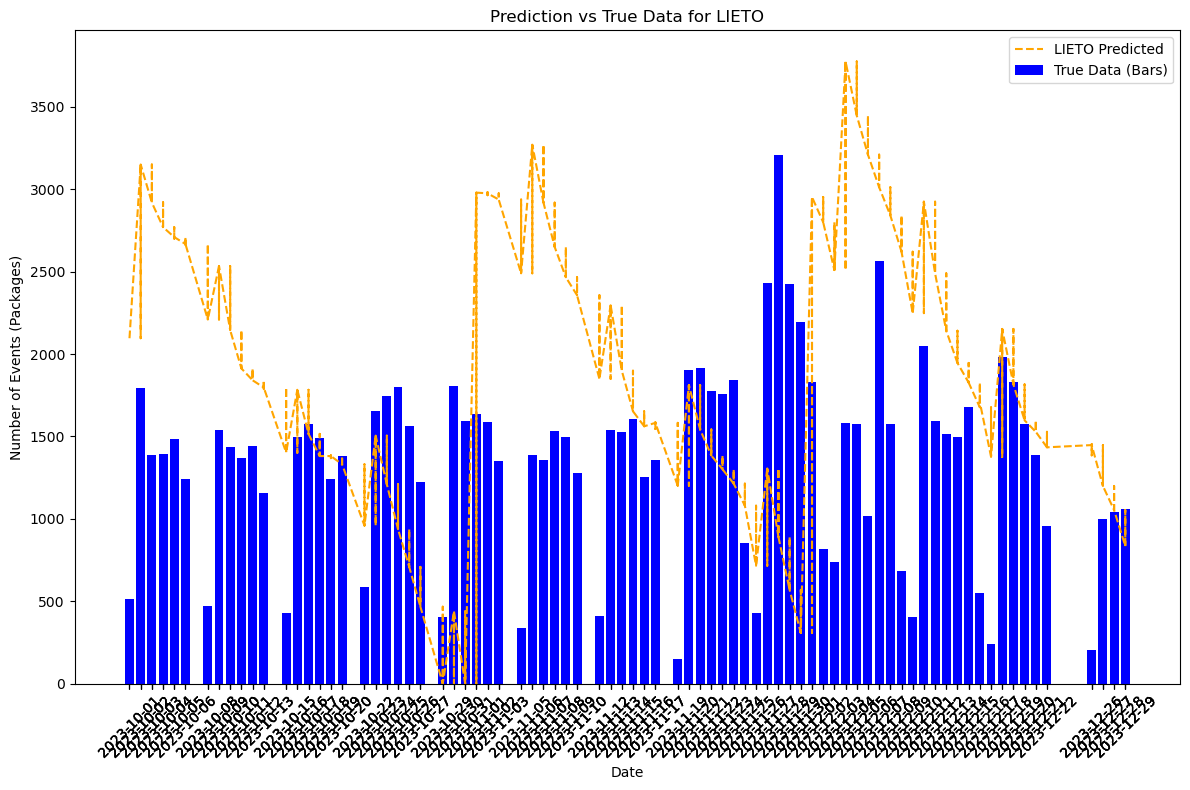

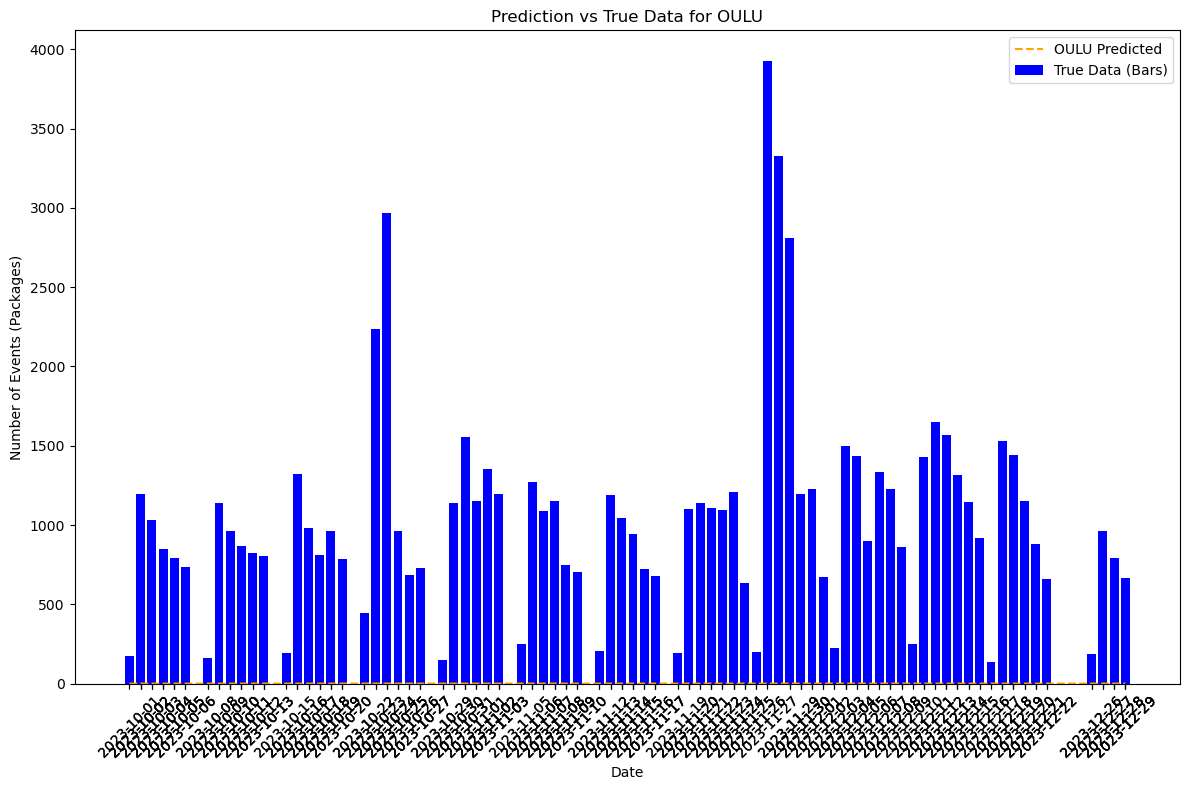

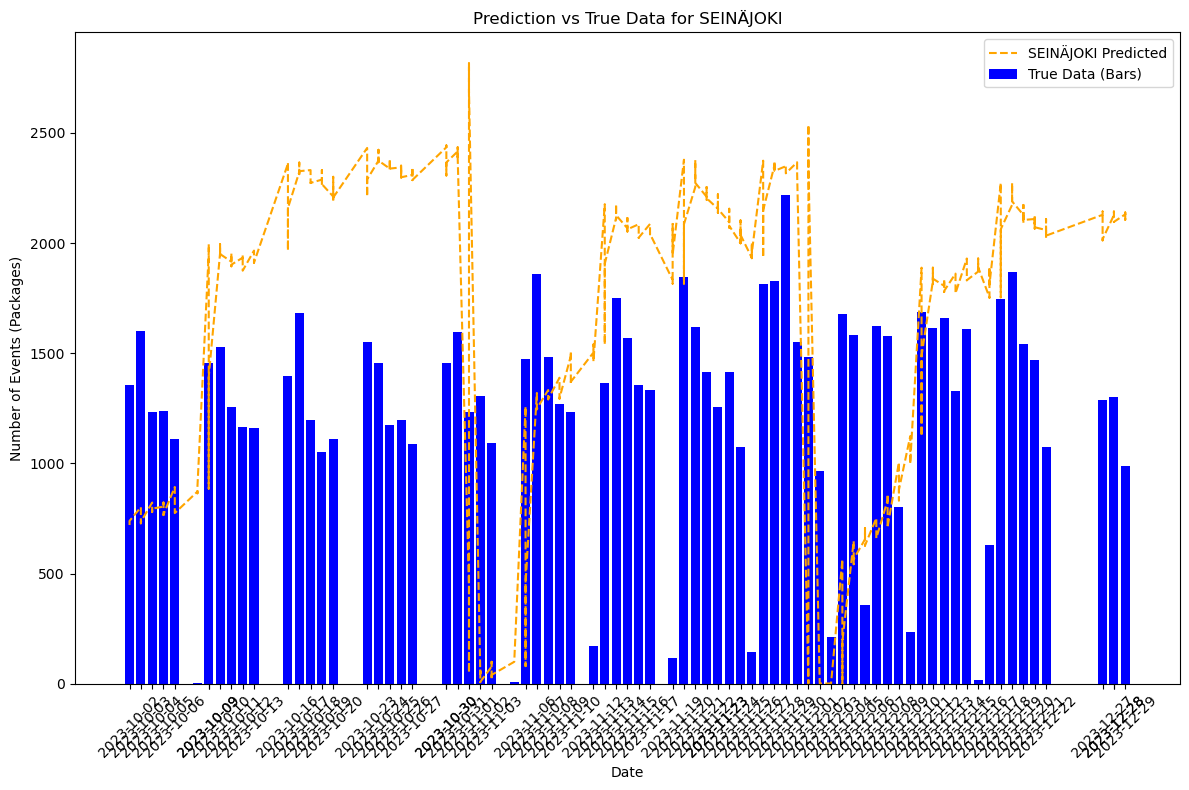

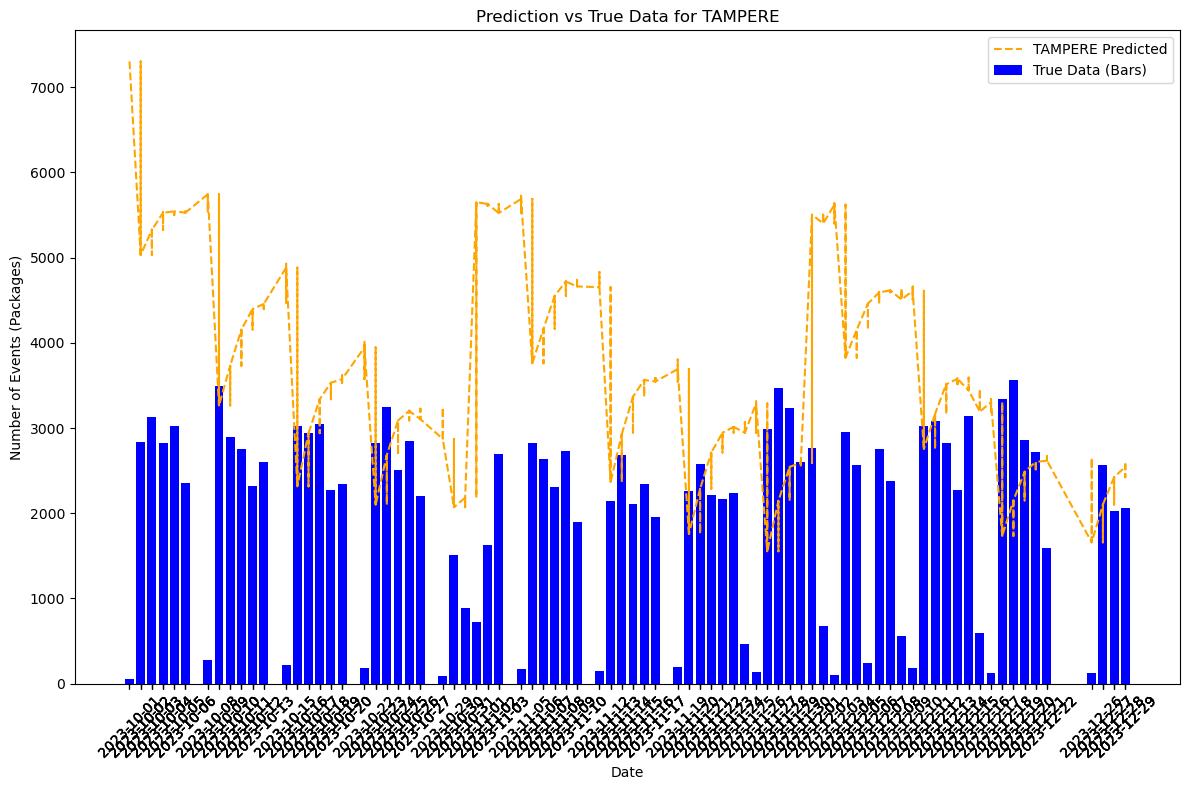

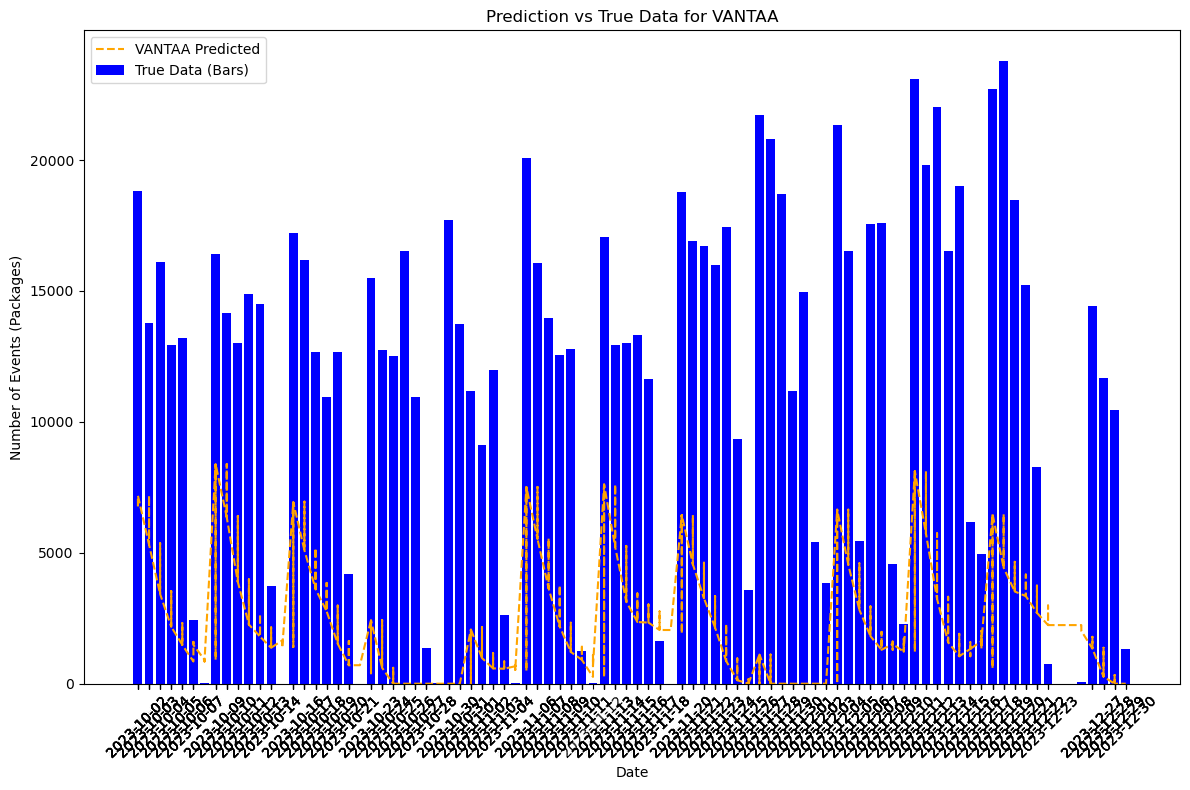

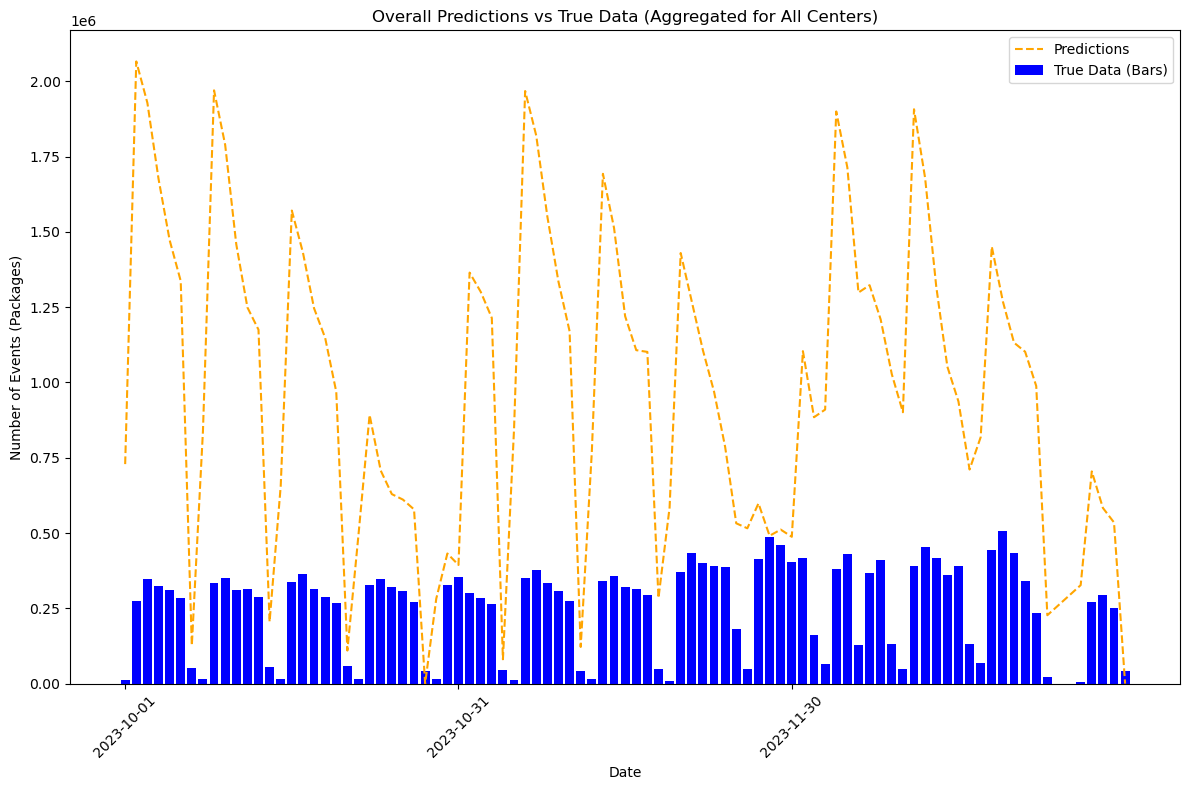

In [9]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset
from torch.amp import GradScaler
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = True

# Assume df is your dataset
# df = pd.read_csv('your_cleaned_data.csv')

# Initialize a dictionary to store prediction results for each sorting center
center_predictions = {}

# Initialize target value scaler
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Create LSTM input sequences
def create_sequences(data, centers, target, sequence_length):
    X, center_X, Y = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        center_X.append(centers[i + sequence_length])
        Y.append(target[i + sequence_length])
    return np.array(X), np.array(center_X), np.array(Y)

# Improved model definition
class ImprovedLSTMModelWithTransformer(nn.Module):
    def __init__(self, num_centers, embed_size, input_size, hidden_size, output_size, num_layers, num_heads, dropout_rate=0.3):
        super(ImprovedLSTMModelWithTransformer, self).__init__()
        self.embedding = nn.Embedding(num_centers, embed_size)
        self.lstm = nn.LSTM(input_size + embed_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True, dropout=dropout_rate)
        self.transformer_encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size * 2, 
            nhead=num_heads, 
            dim_feedforward=hidden_size * 4, 
            dropout=dropout_rate,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(self.transformer_encoder_layer, num_layers=num_layers)
        self.dropout = nn.Dropout(dropout_rate)
        self.bn = nn.BatchNorm1d(hidden_size * 2)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x, center_ids):
        center_embedded = self.embedding(center_ids).unsqueeze(1).repeat(1, x.size(1), 1)
        x = torch.cat([x, center_embedded], dim=-1)
        lstm_out, _ = self.lstm(x)
        transformer_out = self.transformer_encoder(lstm_out)
        out = transformer_out[:, -1, :]
        
        out = self.dropout(out)  # Dropout to prevent overfitting
        out = self.bn(out)       # Batch Normalization
        raw_output = self.fc(out)
        
        out = torch.nn.functional.relu(raw_output)  # Use ReLU to ensure non-negative output
        return out

# Custom loss function with negative value penalty
def custom_loss(output, target):
    huber_loss = nn.HuberLoss()(output, target)
    penalty = torch.sum(torch.relu(-output))  # Penalize all negative values
    return huber_loss + penalty * 0.01  # Adjust penalty weight to reduce aggressive penalty

# Function to initialize model weights
def init_weights(m):
    if isinstance(m, nn.Linear):  # For fully connected layers, use Xavier initialization
        nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain('relu'))
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.01)
    elif isinstance(m, nn.Embedding):  # For embedding layers, use default or custom initialization
        nn.init.normal_(m.weight, mean=0, std=1)  # Initialize embedding layer with normal distribution
    elif isinstance(m, nn.LayerNorm):  # For layer normalization, use appropriate initialization
        nn.init.constant_(m.bias, 0)
        nn.init.constant_(m.weight, 1.0)

# Hyperparameters
sequence_length = 20
embed_size = 26  # Adjust to be divisible by num_heads
hidden_size = 512
output_size = 1
num_layers = 4
num_heads = 8  # 8 attention heads
accumulation_steps = 8
dropout_rate = 0.3
scaler = GradScaler()

# Learning rate scheduler
scheduler_step_size = 10  # Learning rate decay step size
scheduler_gamma = 0.5    # Learning rate decay factor

# Train and test for each sorting center
for center_name in df['sorting_center_name'].unique():
    print(f"Training model for sorting center: {center_name}")
    
    # Filter data for this sorting center
    center_df = df[df['sorting_center_name'] == center_name].copy()
    
    # Encode and extract features
    center_df['center_id'] = center_df['sorting_center_name'].astype('category').cat.codes
    features = center_df[['day', 'month', 'weekday', 'week', 'yearday_sin', 'yearday_cos']].values
    center_ids = center_df['center_id'].values
    targets = center_df['no_of_events'].values

    # Train/Test split - first 9 months for training, last 3 months for testing
    split_date = center_df['scanning_date'].max() - pd.DateOffset(months=3)
    train_df = center_df[center_df['scanning_date'] <= split_date]
    test_df = center_df[center_df['scanning_date'] > split_date]
    
    # Extract training and testing features
    train_features = train_df[['day', 'month', 'weekday', 'week', 'yearday_sin', 'yearday_cos']].values
    train_center_ids = train_df['center_id'].values
    train_targets = train_df['no_of_events'].values

    test_features = test_df[['day', 'month', 'weekday', 'week', 'yearday_sin', 'yearday_cos']].values
    test_center_ids = test_df['center_id'].values
    test_targets = test_df['no_of_events'].values

    # Normalize target values to ensure output is non-negative
    train_targets_scaled = target_scaler.fit_transform(train_targets.reshape(-1, 1))
    test_targets_scaled = target_scaler.transform(test_targets.reshape(-1, 1))

    # Create LSTM input sequences
    X_train, center_train, Y_train = create_sequences(train_features, train_center_ids, train_targets_scaled, sequence_length)
    X_test, center_test, Y_test = create_sequences(test_features, test_center_ids, test_targets_scaled, sequence_length)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    center_train_tensor = torch.tensor(center_train, dtype=torch.long)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(-1)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    center_test_tensor = torch.tensor(center_test, dtype=torch.long)
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(-1)

    train_dataset = TensorDataset(X_train_tensor, center_train_tensor, Y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, center_test_tensor, Y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=False, num_workers=4)  # Increase batch size
    test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False, num_workers=4)

    # Model initialization
    model = ImprovedLSTMModelWithTransformer(num_centers=1, embed_size=embed_size, input_size=X_train.shape[2], 
                                             hidden_size=hidden_size, output_size=output_size, 
                                             num_layers=num_layers, num_heads=num_heads, dropout_rate=dropout_rate).to(device)

    # Apply custom weight initialization
    model.apply(init_weights)

    # Define optimizer and learning rate scheduler
    optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)  # Lower learning rate
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=scheduler_step_size, gamma=scheduler_gamma)  # Decay learning rate every scheduler_step_size epochs

    # Train the model
    epochs = 30
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        running_loss = 0.0
        for i, (batch_X, batch_center, batch_Y) in enumerate(train_loader):
            output = model(batch_X.to(device), batch_center.to(device))
            loss = custom_loss(output, batch_Y.squeeze(-1).to(device)) / accumulation_steps

            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.05)

            if (i + 1) % accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            running_loss += loss.item()

        scheduler.step()  # Learning rate scheduler step
        print(f"Epoch {epoch+1}/{epochs}, Total Loss: {running_loss/len(train_loader)}")

    # Prediction phase
    model.eval()
    test_pred = []
    with torch.no_grad():
        for batch_X, batch_center, _ in test_loader:
            batch_pred = model(batch_X.to(device), batch_center.to(device))
            test_pred.append(batch_pred.cpu().numpy())

    test_pred = np.concatenate(test_pred, axis=0)
    Y_test = Y_test_tensor.cpu().numpy()

    # Inverse transform to original scale
    test_pred_flatten = test_pred.squeeze().reshape(-1, 1)
    Y_test_flatten = Y_test.squeeze().reshape(-1, 1)

    test_pred_original_scale = target_scaler.inverse_transform(test_pred_flatten)
    Y_test_original_scale = target_scaler.inverse_transform(Y_test_flatten)

    # Convert dates to datetime format
    test_dates = pd.to_datetime(test_df['scanning_date'].values[-len(Y_test_flatten):])

    # Store prediction results for each sorting center
    center_predictions[center_name] = pd.DataFrame({
        'date': test_dates,
        'true': Y_test_original_scale.flatten(),
        'predicted': test_pred_original_scale.flatten()
    })

# Visualize predictions for each sorting center
for center_name, df in center_predictions.items():
    plt.figure(figsize=(12, 8))
    # Ensure data is sorted by date to prevent plotting errors due to data order
    df = df.sort_values(by='date')
    
    # True values as bar chart, predicted values as line chart
    plt.bar(df['date'], df['true'], color='blue', label='True Data (Bars)')  # True values as bar chart
    plt.plot(df['date'], df['predicted'], label=f'{center_name} Predicted', color='orange', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Number of Events (Packages)')
    plt.title(f'Prediction vs True Data for {center_name}')
    plt.xticks(pd.to_datetime(df['date']).iloc[::30], rotation=45)  # Show every 30 days to avoid overcrowding
    plt.legend()
    plt.tight_layout()
    plt.show()

# Correct overall prediction aggregation logic to ensure accuracy
all_predictions = pd.concat(center_predictions.values())
all_predictions = all_predictions.groupby('date', as_index=False).sum()

# Visualize overall prediction results
plt.figure(figsize=(12, 8))
plt.bar(all_predictions['date'], all_predictions['true'], color='blue', label='True Data (Bars)')  # True values as bar chart
plt.plot(all_predictions['date'], all_predictions['predicted'], label='Predictions', color='orange', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Number of Events (Packages)')
plt.title('Overall Predictions vs True Data (Aggregated for All Centers)')
plt.xticks(pd.to_datetime(all_predictions['date']).iloc[::30], rotation=45)  # Show every 30 days to avoid overcrowding
plt.legend()
plt.tight_layout()
plt.show()